# Matrix Multiplication

This notebook has been translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/spots_pointlists_matrices_tables/)

It shows how to operate on spot images, pointlists, distance matrices and touch matrices in the GPU.


## Initialize GPU

In [2]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")
print("Used GPU: " + cle.get_device().name)

Used GPU: gfx902


## Define a small array representing a spot detection result and push it to the GPU

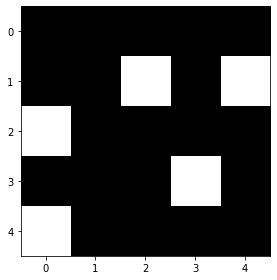

In [22]:
array = np.asarray(
    [
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0]
    ]
)

spots_image = cle.push_zyx(array)

imshow(cle.pull_zyx(spots_image))

## Convert the spot image into a point list

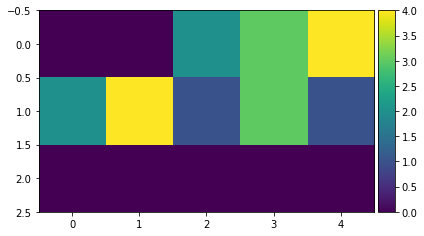

In [23]:
labeled_spots = cle.connected_components_labeling_box(spots_image)
pointlist = cle.create([3, 5])
cle.labelled_spots_to_pointlist(labeled_spots, pointlist)
imshow(cle.pull_zyx(pointlist))

## Determine the distance between all spots and write the result as distance matrix

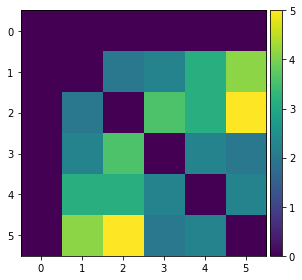

In [24]:
distance_matrix = cle.generate_distance_matrix(pointlist, pointlist)

imshow(cle.pull_zyx(distance_matrix))

## Blow labels up, until they touch (Voronoi diagram)

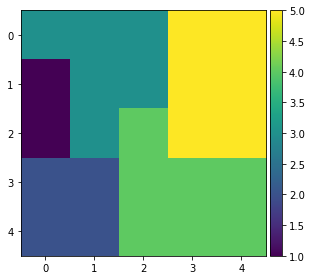

In [25]:
label_voronoi = cle.voronoi_labeling(spots_image)

imshow(cle.pull_zyx(label_voronoi))

## Analyze touching labels and save it as a touch matrix

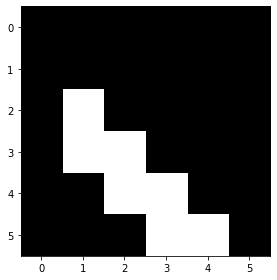

In [26]:
touch_matrix = cle.create([6,6])
cle.generate_touch_matrix(label_voronoi, touch_matrix)

imshow(cle.pull_zyx(touch_matrix))

## Count neighbors for every touching node

In [32]:
count_vector = cle.create([6, 1])
cle.sum_x_projection(touch_matrix, count_vector)

array([[0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.]], dtype=float32)